# Análisis Exploratorio de Datos (EDA) - Base de Datos de Accidentes Laborales

## 1. Importación de Bibliotecas y Carga de Datos

Primero, importaremos las bibliotecas necesarias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.utils import *
import warnings
warnings.filterwarnings('ignore')

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

## 2. Carga y Exploración Inicial de Datos

En esta sección, cargaremos nuestro conjunto de datos y examinaremos su estructura básica.

In [ ]:
# Cargar datos sin usar la primera columna como índice
df = pd.read_excel(".\clasificacion_siniestros.xlsx", index_col=0)

# Información básica del dataset
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas del dataset:")
display(df.head())

Dimensiones del dataset: (63164, 65)

Primeras 5 filas del dataset:


,ID_FURAT_FUREP_IGDACMLMASOLICITUDES,emp_Id_IGDACMLMASOLICITUDES,ID_ACT_ECONOMICA_IGDACMLMASOLICITUDES,seg_idPonderado_IGDACMLMASOLICITUDES,ID_SOLICITUD_IGDACMLMASOLICITUDES,FECHA_SOLICITUD_IGDACMLMASOLICITUDES,FECHA_MODIFICACION_AUD_IGDACMLMASOLICITUDES,DTO_IGDACMLMASOLICITUDES,PCL_IGDACMLMASOLICITUDES,TIPO_SINIESTRO_IGDACMLMASOLICITUDES,ID_TIPO_DOC_EMP_IGDACMLMASOLICITUDES,FECHA_SINIESTRO_IGDACMLMASOLICITUDES,ID_FURAT_IGATEPMAFURAT,ID_SINIESTRO_IGATEPMAFURAT,HORA_AT_IGATEPMAFURAT,MINUTO_AT_IGATEPMAFURAT,IND_TIPO_JORNADA_AT_IGATEPMAFURAT,IND_REALIZANDO_TRABAJO_HAB_AT_IGATEPMAFURAT,ID_OCUPACION_AT_IGATEPMAFURAT,NOMBRE_OCUPACION_IGATEPMAFURAT,HORAS_PREVIO_AT_IGATEPMAFURAT,MINUTOS_PREVIO_AT_IGATEPMAFURAT,IND_TIPO_AT_IGATEPMAFURAT,IND_MUERTE_IGATEPMAFURAT,FECHA_MUERTE_IGATEPMAFURAT,ID_DEPARTAMENTO_AT_IGATEPMAFURAT,ID_MUNICIPIO_AT_IGATEPMAFURAT,IND_ZONA_IGATEPMAFURAT,IND_SITIO_OCURRENCIA_IGATEPMAFURAT,OTRO_SITIO_OCURRENCIA_IGATEPMAFURAT,ID_TIPO_LESION_IGATEPMAFURAT,OTRO_TIPO_LESION_IGATEPMAFURAT,ID_PARTE_CUERPO_IGATEPMAFURAT,ID_AGENTE_AT_IGATEPMAFURAT,ID_MECANISMO_AT_IGATEPMAFURAT,OTRO_MECANISMO_ACCIDENTE_IGATEPMAFURAT,IND_TESTIGO_AT_IGATEPMAFURAT,DESCRIPCION_AT_IGATEPMAFURAT,FECHA_DILIGENCIAMIENTO_IGATEPMAFURAT,FECHA_RADICACION_IGATEPMAFURAT,ID_MEDIO_RECEPCION_IGATEPMAFURAT,OFICIO_SOLICITUD_IGATEPMAFURAT,CENTRO_TRABAJO_IGUAL_IGATEPMAFURAT,ACCIDENTE_GRAVE_IGATEPMAFURAT,RIESGO_BIOLOGICO_IGATEPMAFURAT,ID_SITIO_OCURRENCIA_IGATEPMAFURAT,MONTO_RESERVA_IGATEPMAFURAT,DIAS_INCAPACIDAD_IGATEPMAFURAT,MUERTE_POSTERIOR_IGATEPMAFURAT,ESTADO_RESERVA_IGATEPMAFURAT,FECHA_AVISO_MUERTE_IGATEPMAFURAT,FECHA_MODIFICACION_AUD_IGATEPMAFURAT,ID_SOLICITUD_IGACCTMIMVDIAGNOSTICOS,CONS_DIAG_IGACCTMIMVDIAGNOSTICOS,NOMBRE_DIAGNOSTICO_IGACCTMIMVDIAGNOSTICOS,ID_DX_IGACCTMIMVDIAGNOSTICOS,TIPO_CALIFICADOR_IGACCTMIMVDIAGNOSTICOS,TIPO_CALIFICACION_IGACCTMIMVDIAGNOSTICOS,FECHA_MODIFICACION_AUD_IGACCTMIMVDIAGNOSTICOS,ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN,ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN,ORIGEN_IGDACTMLMACALIFICACIONORIGEN,FECHA_DICTAMEN_IGDACTMLMACALIFICACIONORIGEN,FECHA_ESTRUCTURACION_IGDACTMLMACALIFICACIONORIGEN,FECHA_MODIFICACION_AUD_IGDACTMLMACALIFICACIONORIGEN
0,25460364,105339902,NaN,-1,1283816,2015-02-06 00:00:00+00:00,2015-02-06 00:00:00+00:00,S,S,0,NI,2009-03-05 00:00:00+00:00,25460364,25488370,9,20,1,S,8271.0,"OPERADORES DE MÃQUINAS PARA PROCESAR CARNE, P...",2,20,5,0.0,NaN,68,1,2,2,,41,,446,336,9,HERIDA POR CUCHILLO,1,EL TRABAJADOR SE ENCONTRABA REALIZANDO SU LABO...,2009-04-02 00:00:00+00:00,2009-04-02 00:00:00+00:00,5,N,1,N,N,1,NaN,NaN,NaN,NaN,NaN,2009-04-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1283816,1207565,1,2014-11-12 14:01:40+00:00,2014-10-22 00:00:00+00:00,2016-05-13 07:20:25+00:00
1,25460077,105667103,NaN,11,1283650,2015-02-06 00:00:00+00:00,2015-02-06 00:00:00+00:00,S,S,0,CC,2009-03-04 00:00:00+00:00,25460077,25488067,1,15,1,S,9223.0,"LAVADORES DE VEHÃCULOS, VENTANAS Y AFINES",7,15,5,0.0,NaN,76,1,3,2,,55,,3,5,3,,0,EL TRABAJADOR SE ENCONTRABA LAVANDO EL CHASIS ...,2009-04-02 00:00:00+00:00,2009-04-02 00:00:00+00:00,5,N,1,N,N,1,NaN,NaN,NaN,NaN,NaN,2009-04-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1283650,1205523,2,2014-11-11 16:46:02+00:00,2014-11-07 00:00:00+00:00,2014-11-11 16:46:02+00:00
2,25460269,105320992,NaN,6,1283758,2015-02-06 00:00:00+00:00,2015-02-06 00:00:00+00:00,S,S,0,NI,2009-03-05 00:00:00+00:00,25460269,25488274,13,0,1,S,2143.0,"INGENIEROS ELÃ‰CTRICOS, INGENIEROS ELECTRÃ“NIC...",5,0,5,0.0,NaN,11,1,3,2,,55,,4,5,1,,0,EL TRABAJADOR SE ENCONTRABA SENTANDOSE EN UNA ...,2009-04-02 00:00:00+00:00,2009-04-02 00:00:00+00:00,5,N,1,N,N,1,NaN,NaN,NaN,NaN,NaN,2009-04-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1283758,1207289,2,2014-11-12 11:21:34+00:00,2014-11-10 00:00:00+00:00,2014-11-12 11:21:34+00:00
3,25460297,105734010,NaN,6,1283778,2015-02-06 00:00:00+00:00,2015-02-06 00:00:00+00:00,S,S,0,NI,2009-03-04 00:00:00+00:00,25460297,25488302,11,0,1,S,7742.0,EBANISTAS Y AFINES,6,0,5,0.0,NaN,11,1,3,2,,50,,112,4,9,

## 3. Análisis de Valores Faltantes

Analizaremos la presencia de valores faltantes en nuestro conjunto de datos para determinar su impacto en el análisis.


In [3]:
# Cálculo de valores faltantes
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

# Crear DataFrame con información de valores faltantes
missing_info = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje': missing_percentages
})

# Mostrar solo columnas con valores faltantes
print("Análisis de Valores Faltantes:")
display(missing_info[missing_info['Valores Faltantes'] > 0].sort_values('Porcentaje', ascending=False))

Análisis de Valores Faltantes:


,Valores Faltantes,Porcentaje
FECHA_AVISO_MUERTE_IGATEPMAFURAT,63160,99.993667
MONTO_RESERVA_IGATEPMAFURAT,62987,99.719777
DIAS_INCAPACIDAD_IGATEPMAFURAT,62955,99.669115
FECHA_MUERTE_IGATEPMAFURAT,62949,99.659616
ESTADO_RESERVA_IGATEPMAFURAT,61057,96.664239
MUERTE_POSTERIOR_IGATEPMAFURAT,60995,96.566082
TIPO_CALIFICADOR_IGACCTMIMVDIAGNOSTICOS,54597,86.436894
NOMBRE_DIAGNOSTICO_IGACCTMIMVDIAGNOSTICOS,54563,86.383066
FECHA_MODIFICACION_AUD_IGACCTMIMVDIAGNOSTICOS,54561,86.379900
TIPO_CALIFICACION_IGACCTMIMVDIAGNOSTICOS,54561,86.379900


## 4. Análisis de Variables Numéricas

Examinaremos las estadísticas descriptivas de nuestras variables numéricas.

Estadísticas Descriptivas de Variables Numéricas:


,ID_FURAT_FUREP_IGDACMLMASOLICITUDES,emp_Id_IGDACMLMASOLICITUDES,ID_ACT_ECONOMICA_IGDACMLMASOLICITUDES,seg_idPonderado_IGDACMLMASOLICITUDES,ID_SOLICITUD_IGDACMLMASOLICITUDES,TIPO_SINIESTRO_IGDACMLMASOLICITUDES,ID_FURAT_IGATEPMAFURAT,ID_SINIESTRO_IGATEPMAFURAT,HORA_AT_IGATEPMAFURAT,MINUTO_AT_IGATEPMAFURAT,IND_TIPO_JORNADA_AT_IGATEPMAFURAT,ID_OCUPACION_AT_IGATEPMAFURAT,HORAS_PREVIO_AT_IGATEPMAFURAT,MINUTOS_PREVIO_AT_IGATEPMAFURAT,IND_TIPO_AT_IGATEPMAFURAT,IND_MUERTE_IGATEPMAFURAT,ID_DEPARTAMENTO_AT_IGATEPMAFURAT,ID_MUNICIPIO_AT_IGATEPMAFURAT,IND_ZONA_IGATEPMAFURAT,IND_SITIO_OCURRENCIA_IGATEPMAFURAT,ID_TIPO_LESION_IGATEPMAFURAT,ID_PARTE_CUERPO_IGATEPMAFURAT,ID_AGENTE_AT_IGATEPMAFURAT,ID_MECANISMO_AT_IGATEPMAFURAT,IND_TESTIGO_AT_IGATEPMAFURAT,ID_MEDIO_RECEPCION_IGATEPMAFURAT,CENTRO_TRABAJO_IGUAL_IGATEPMAFURAT,ID_SITIO_OCURRENCIA_IGATEPMAFURAT,MONTO_RESERVA_IGATEPMAFURAT,DIAS_INCAPACIDAD_IGATEPMAFURAT,ESTADO_RESERVA_IGATEPMAFURAT,ID_SOLICITUD_IGACCTMIMVDIAGNOSTICOS,CONS_DIAG_IGACCTMIMVDIAGNOSTICOS,TIPO_CALIFICADOR_IGACCTMIMVDIAGNOSTICOS,ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN,ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN,ORIGEN_IGDACTMLMACALIFICACIONORIGEN
count,6.316400e+04,6.316400e+04,1.438200e+04,63164.000000,6.316400e+04,63164.000000,6.316400e+04,6.316400e+04,63164.000000,63164.000000,63164.000000,51493.000000,63164.000000,63164.000000,63164.000000,63163.000000,63164.000000,63164.000000,63164.000000,63164.000000,63164.000000,63164.000000,63164.00000,63164.000000,63164.000000,63164.000000,63164.000000,63164.000000,177.0,209.0,2107.0,8.603000e+03,8603.000000,8567.000000,6.316400e+04,6.316400e+04,63164.000000
mean,2.958002e+07,1.053265e+08,3.521061e+06,1.224321,9.132473e+05,0.441011,2.958002e+07,2.958886e+07,11.122665,14.302419,1.016718,7569.943507,3.679612,8.358828,4.835698,0.003546,32.210816,194.050583,1.292350,2.272940,52.254655,179.489583,67.38571,2.928504,0.502644,2.672662,0.602099,2.192404,0.0,0.0,1.0,3.913805e+05,1.353714,1.296136,9.132473e+05,8.163319e+05,1.964505
std,8.534974e+06,3.055298e+05,1.891461e+06,4.291407,6.370873e+05,0.530070,8.534974e+06,8.519870e+06,4.413555,16.582150,0.660438,3661.373157,3.294556,13.067315,0.805272,0.059446,27.616286,285.958809,1.318081,2.195381,23.132731,222.624893,129.80105,3.063289,0.532504,1.913052,0.489469,2.315308,0.0,0.0,0.0,5.471389e+05,1.041046,1.155730,6.370873e+05,5.496713e+05,0.197847
min,1.000078e+07,1.004196e+08,0.000000e+00,-1.000000,5.000000e+00,0.000000,1.000078e+07,1.000082e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,0.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0,5.900000e+01,1.000000,0.000000,5.000000e+00,8.000000e+00,1.000000
25%,2.518641e+07,1.052408e+08,1.924101e+06,-1.000000,1.606552e+05,0.000000,2.518641e+07,2.518822e+07,8.000000,0.000000,1.000000,6115.000000,0.000000,0.000000,5.000000,0.000000,11.000000,1.000000,0.000000,1.000000,41.000000,3.000000,5.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,1.0,4.744300e+04,1.000000,1.000000,1.606552e+05,1.835678e+05,2.000000
50%,2.536987e+07,1.053186e+08,3.242902e+06,-1.000000,1.277042e+06,0.000000,2.536987e+07,2.537248e+07,11.000000,0.000000,1.000000,9999.000000,3.000000,1.000000,5.000000,0.000000,19.000000,1.000000,1.000000,2.000000,50.000000,6.000000,5.00000,1.000000,0.000000,1.000000,1.000000,2.000000,0.0,0.0,1.0,7.080800e+04,1.000000,1.000000,1.277042e+06,1.166494e+06,2.000000
75%,2.546404e+07,1.053595e+08,5.101001e+06,-1.000000,1.456164e+06,1.000000,2.546404e+07,2.549217e+07,15.000000,30.000000,1.000000,9999.000000,6.000000,10.000000,5.000000,0.000000,66.000000,317.000000,3.000000,2.000000,55.000000,446.000000,6.00000,3.000000,1.000000,5.000000,1.000000,2.000000,0.0,0.0,1.0,7.924505e+05,1.000000,1.000000,1.456164e+06,1.341235e+06,2.000000
max,2.318345e+08,1.059014e+08,9.999999e+06,11.000000,1.843024e+06,3.000000,2.318345e+08,1.264261e+08,24.000000,59.000000,4.000000,9999.000000,30.000000,59.000000,6.0

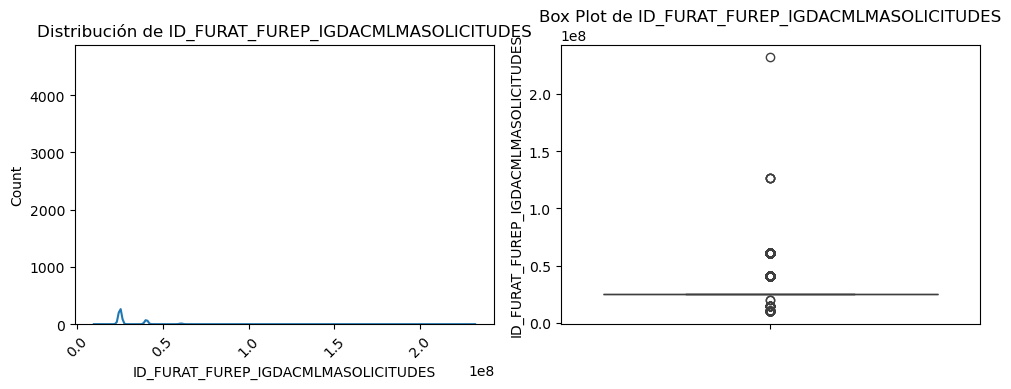

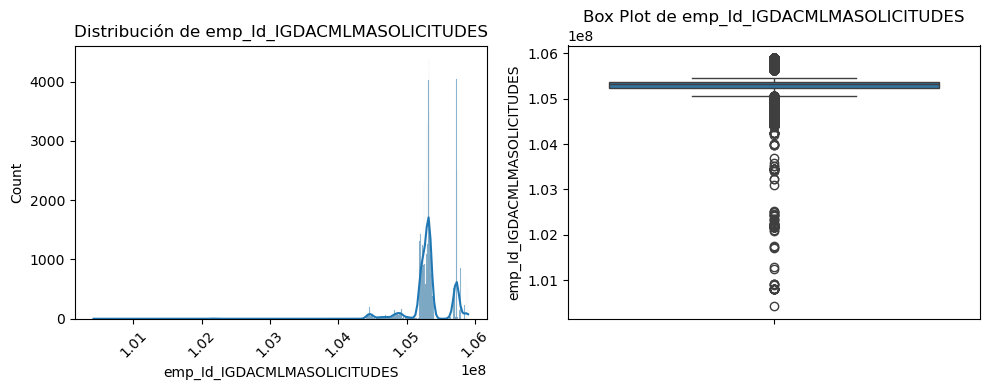

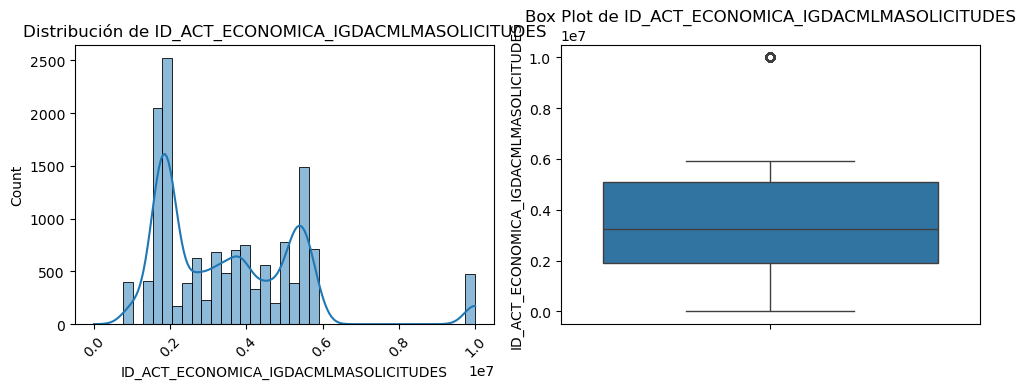

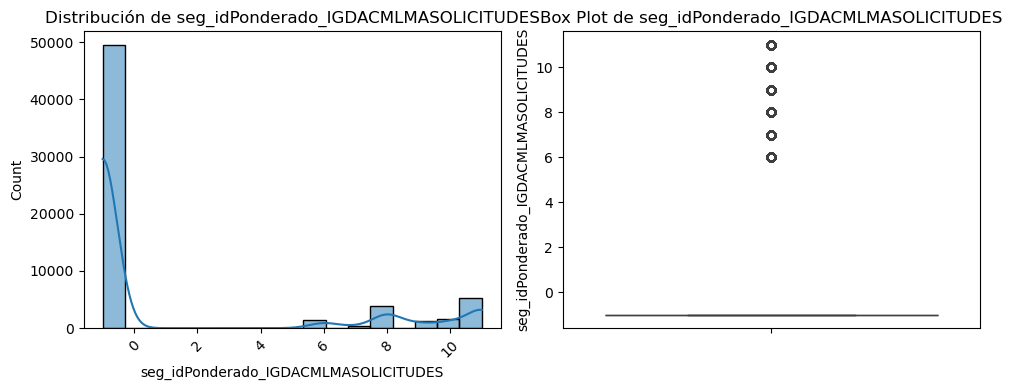

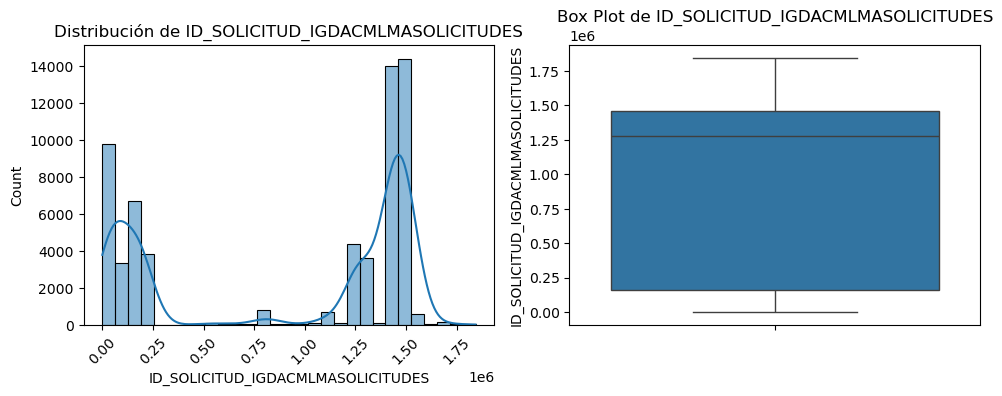

In [4]:
# Identificar columnas numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Estadísticas descriptivas
print("Estadísticas Descriptivas de Variables Numéricas:")
display(df[numerical_cols].describe())

# Visualización de distribuciones
for col in numerical_cols[:5]:  # Primeras 5 columnas numéricas
    plt.figure(figsize=(10, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Box Plot de {col}')
    
    plt.tight_layout()
    plt.show()


## 5. Análisis de Variables Categóricas

Analizaremos la distribución y frecuencia de nuestras variables categóricas.


Distribución de valores para FECHA_SOLICITUD_IGDACMLMASOLICITUDES:


FECHA_SOLICITUD_IGDACMLMASOLICITUDES
2015-07-27 00:00:00+00:00    14707
2015-07-22 00:00:00+00:00    11568
2010-02-15 00:00:00+00:00    10021
2015-02-06 00:00:00+00:00     4269
2015-02-05 00:00:00+00:00     3626
Name: count, dtype: int64

Número de valores únicos: 14311


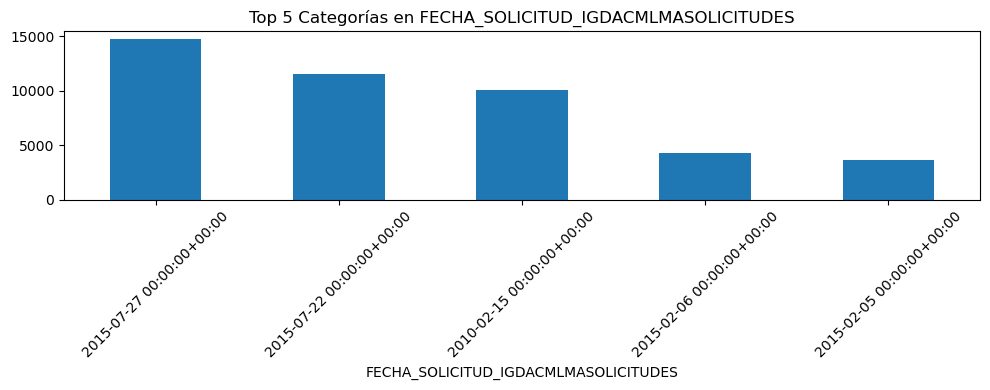


Distribución de valores para FECHA_MODIFICACION_AUD_IGDACMLMASOLICITUDES:


FECHA_MODIFICACION_AUD_IGDACMLMASOLICITUDES
2015-07-27 00:00:00+00:00    14666
2015-07-22 00:00:00+00:00    11520
2010-02-15 00:00:00+00:00     9541
2015-02-06 00:00:00+00:00     4228
2015-02-05 00:00:00+00:00     3610
Name: count, dtype: int64

Número de valores únicos: 16868


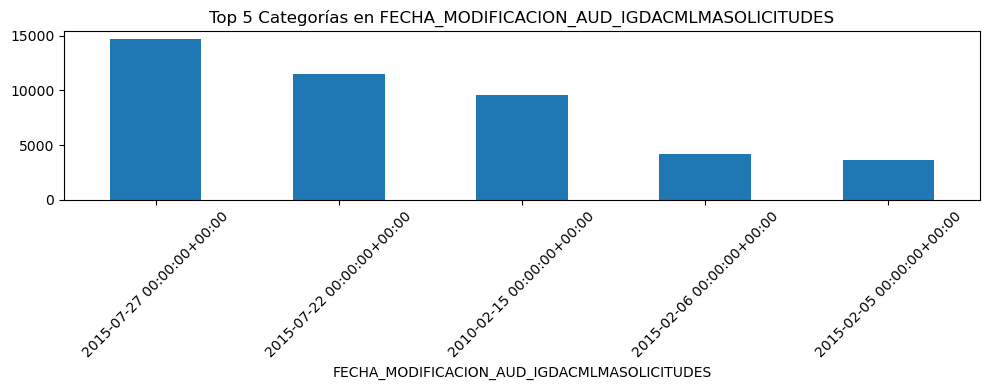


Distribución de valores para DTO_IGDACMLMASOLICITUDES:


DTO_IGDACMLMASOLICITUDES
S    61325
N     1052
       207
Name: count, dtype: int64

Número de valores únicos: 3


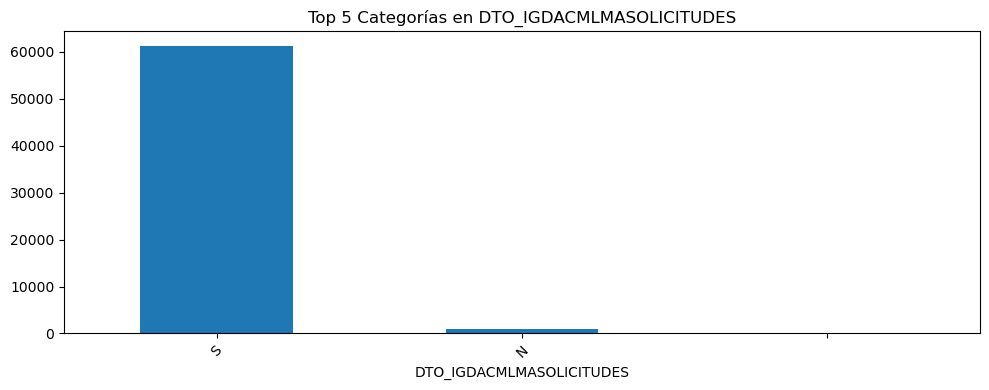


Distribución de valores para PCL_IGDACMLMASOLICITUDES:


PCL_IGDACMLMASOLICITUDES
S    55003
N     2079
       208
Name: count, dtype: int64

Número de valores únicos: 3


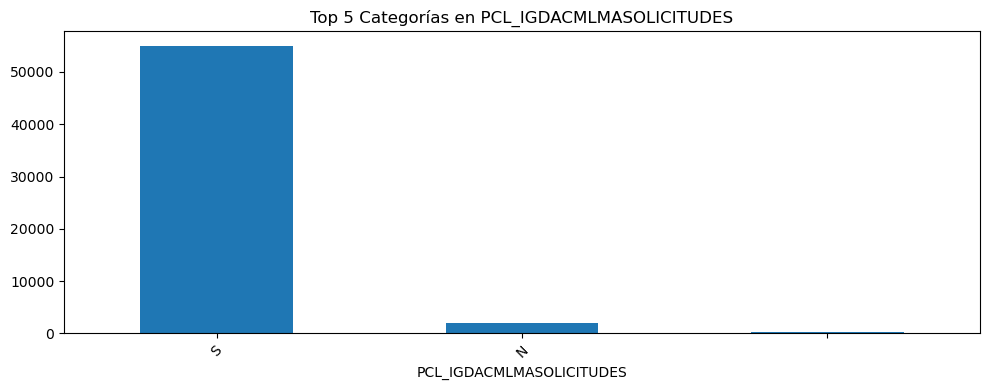


Distribución de valores para ID_TIPO_DOC_EMP_IGDACMLMASOLICITUDES:


ID_TIPO_DOC_EMP_IGDACMLMASOLICITUDES
NI    55186
CC     7975
CE        3
Name: count, dtype: int64

Número de valores únicos: 3


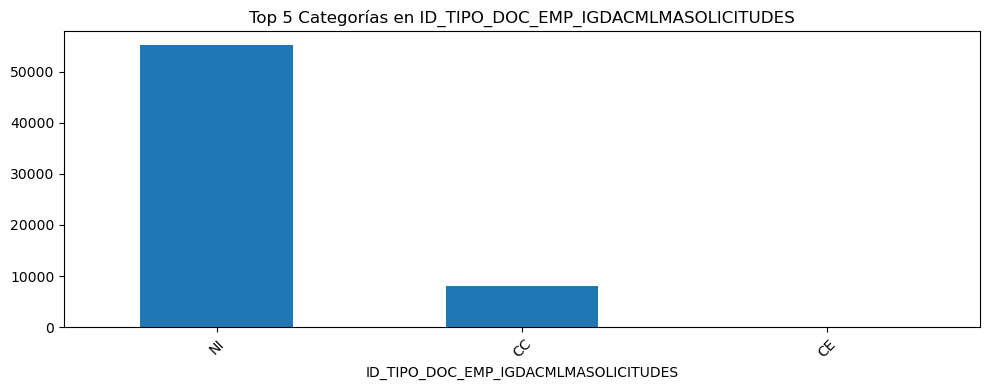


Distribución de valores para FECHA_SINIESTRO_IGDACMLMASOLICITUDES:


FECHA_SINIESTRO_IGDACMLMASOLICITUDES
2009-08-18 00:00:00+00:00    209
2009-08-25 00:00:00+00:00    197
2009-09-21 00:00:00+00:00    197
2009-08-24 00:00:00+00:00    192
2009-07-13 00:00:00+00:00    189
Name: count, dtype: int64

Número de valores únicos: 4131


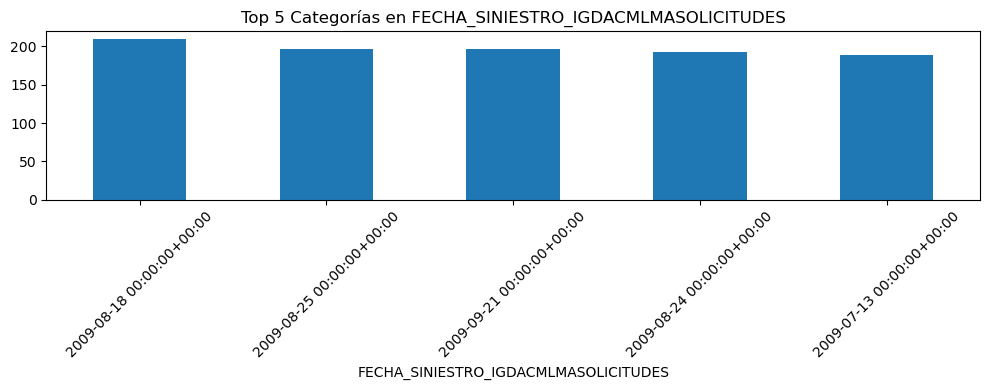


Distribución de valores para IND_REALIZANDO_TRABAJO_HAB_AT_IGATEPMAFURAT:


IND_REALIZANDO_TRABAJO_HAB_AT_IGATEPMAFURAT
SI                 36710
S                  18477
SIN INFORMACION     7283
NO                   472
N                    221
Name: count, dtype: int64

Número de valores únicos: 6


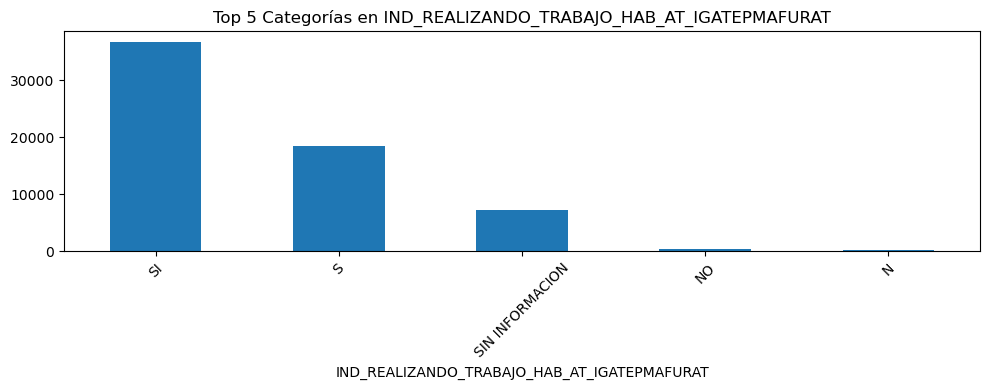


Distribución de valores para NOMBRE_OCUPACION_IGATEPMAFURAT:


NOMBRE_OCUPACION_IGATEPMAFURAT
                                            32315
OTRAS OCUPACIONES                            5217
OBREROS DE LA CONSTRUCCIÃ“N DE EDIFICIOS     2220
TRABAJADORES AGROPECUARIOS                    907
MINEROS Y CANTEROS                            818
Name: count, dtype: int64

Número de valores únicos: 345


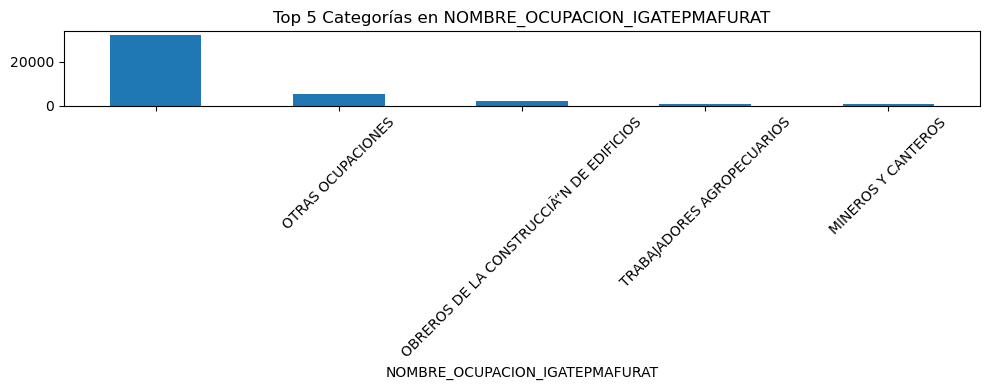


Distribución de valores para FECHA_MUERTE_IGATEPMAFURAT:


FECHA_MUERTE_IGATEPMAFURAT
2009-10-07 00:00:00+00:00    4
2009-10-05 00:00:00+00:00    4
2009-12-03 00:00:00+00:00    3
2008-07-23 00:00:00+00:00    3
2009-09-21 00:00:00+00:00    3
Name: count, dtype: int64

Número de valores únicos: 172


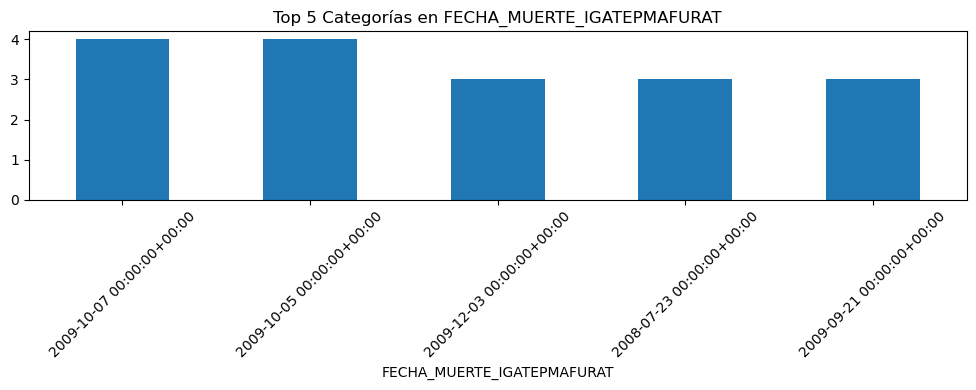


Distribución de valores para OTRO_SITIO_OCURRENCIA_IGATEPMAFURAT:


OTRO_SITIO_OCURRENCIA_IGATEPMAFURAT
                     46766
VIA PUBLICA            155
OBRA                    82
CENTRO DE TRABAJO       70
CULTIVOS                62
Name: count, dtype: int64

Número de valores únicos: 2543


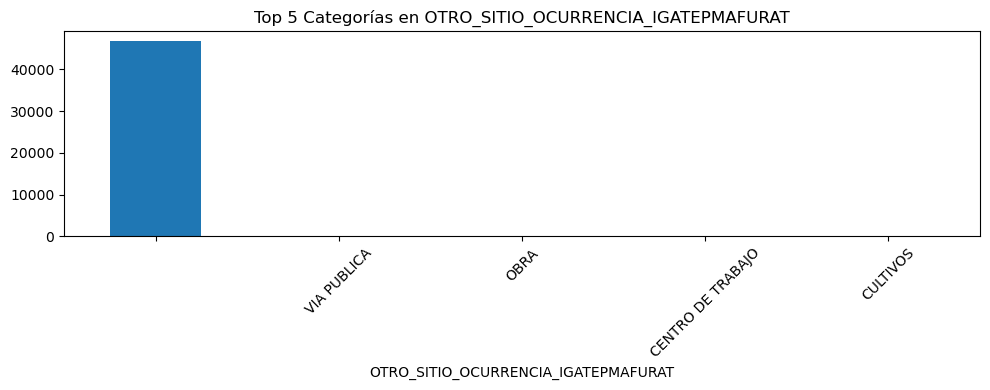


Distribución de valores para OTRO_TIPO_LESION_IGATEPMAFURAT:


OTRO_TIPO_LESION_IGATEPMAFURAT
                    50680
PICADURA               54
RIESGO BIOLOGICO       25
PUNCIÃ“N               20
PINCHAZO               18
Name: count, dtype: int64

Número de valores únicos: 265


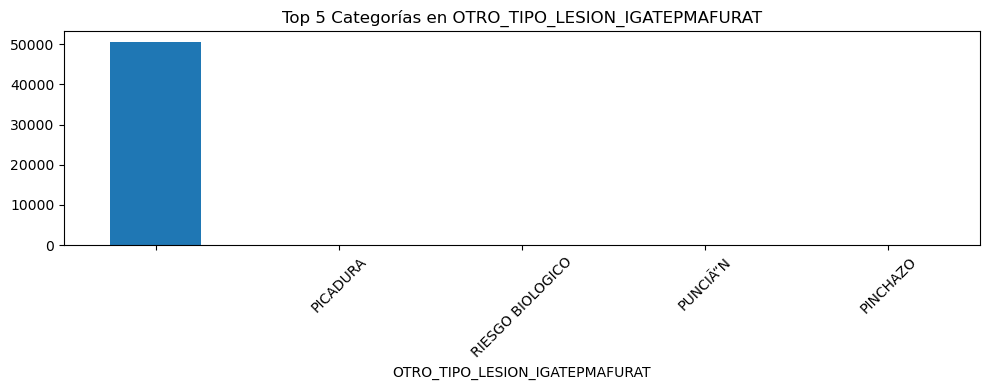


Distribución de valores para OTRO_MECANISMO_ACCIDENTE_IGATEPMAFURAT:


OTRO_MECANISMO_ACCIDENTE_IGATEPMAFURAT
                          47438
CORTADA                     362
HERIDA                      337
CUERPO EXTRAÃ‘O EN OJO      177
PINCHAZO                    149
Name: count, dtype: int64

Número de valores únicos: 977


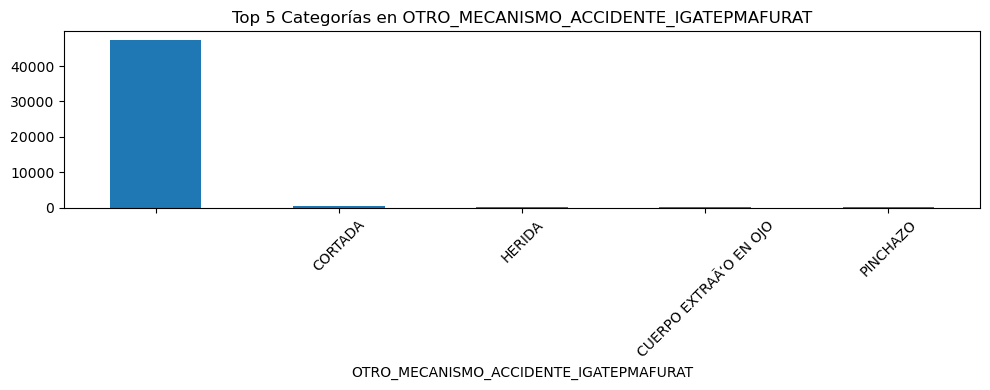


Distribución de valores para DESCRIPCION_AT_IGATEPMAFURAT:


DESCRIPCION_AT_IGATEPMAFURAT
                              2132
NO IDENTIFICADO                212
NO ES LEGIBLE                   42
TRAUMA EN EL OJO IZQUIERDO      22
DESCRIPCION ILEGIBLE            20
Name: count, dtype: int64

Número de valores únicos: 55235


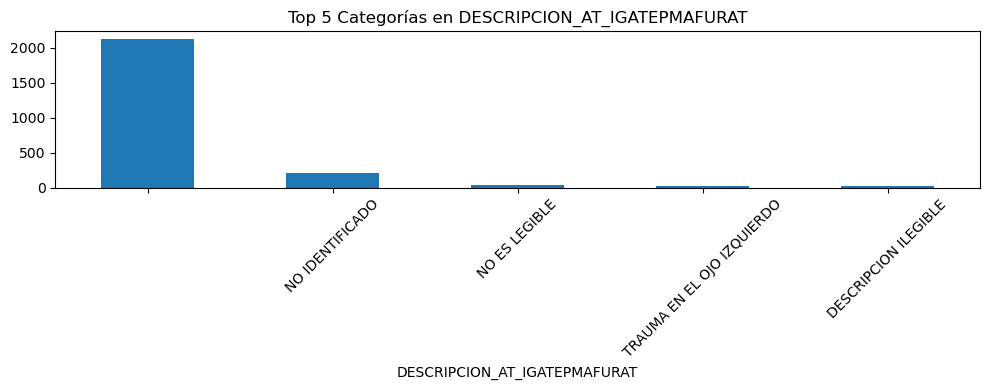


Distribución de valores para FECHA_DILIGENCIAMIENTO_IGATEPMAFURAT:


FECHA_DILIGENCIAMIENTO_IGATEPMAFURAT
2009-09-29 00:00:00+00:00    244
2009-12-03 00:00:00+00:00    207
2009-09-30 00:00:00+00:00    203
2009-11-27 00:00:00+00:00    201
2009-10-13 00:00:00+00:00    201
Name: count, dtype: int64

Número de valores únicos: 15891


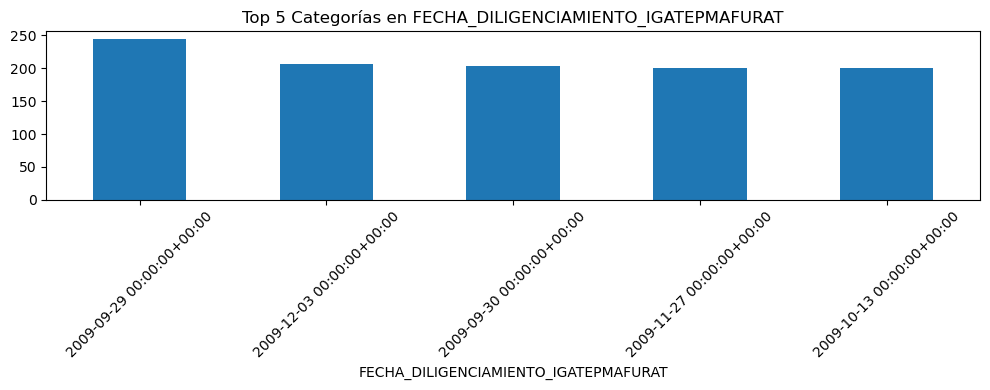


Distribución de valores para FECHA_RADICACION_IGATEPMAFURAT:


FECHA_RADICACION_IGATEPMAFURAT
2009-09-29 00:00:00+00:00    244
2009-12-03 00:00:00+00:00    209
2009-09-30 00:00:00+00:00    208
2009-11-19 00:00:00+00:00    204
2009-11-27 00:00:00+00:00    202
Name: count, dtype: int64

Número de valores únicos: 16463


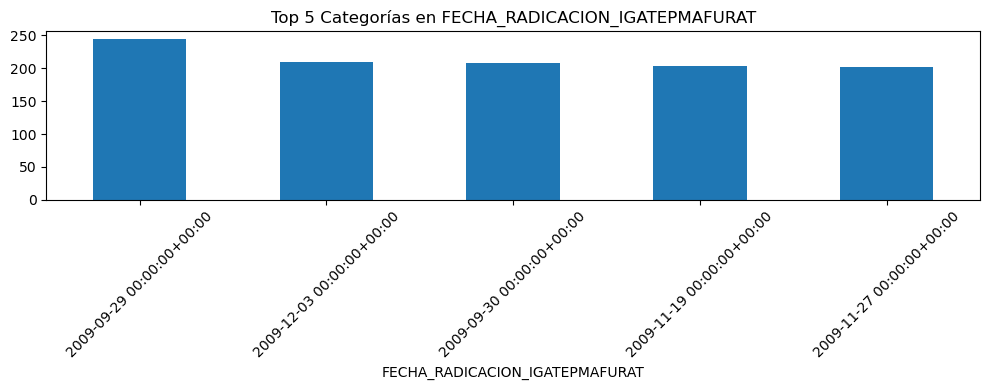


Distribución de valores para OFICIO_SOLICITUD_IGATEPMAFURAT:


OFICIO_SOLICITUD_IGATEPMAFURAT
N     28257
      22946
No    11851
Si      109
0         1
Name: count, dtype: int64

Número de valores únicos: 5


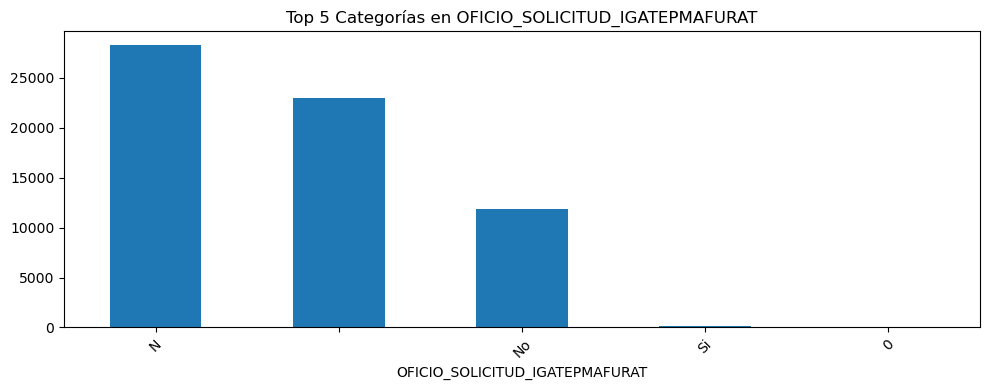


Distribución de valores para ACCIDENTE_GRAVE_IGATEPMAFURAT:


ACCIDENTE_GRAVE_IGATEPMAFURAT
N    61459
S     1704
0        1
Name: count, dtype: int64

Número de valores únicos: 3


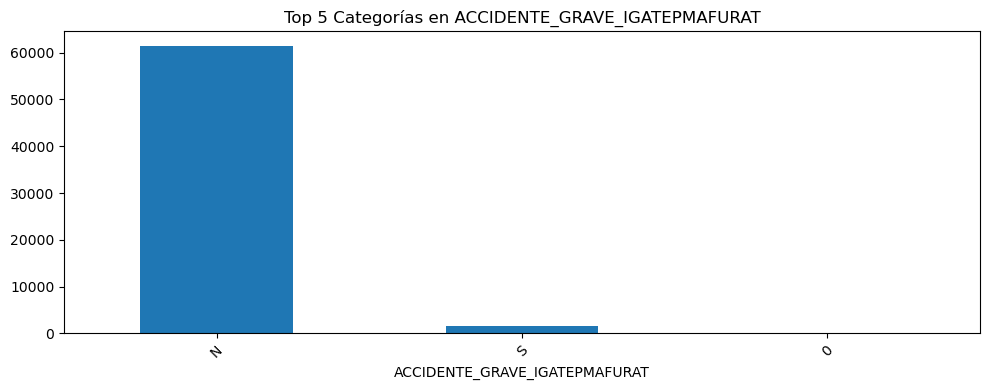


Distribución de valores para RIESGO_BIOLOGICO_IGATEPMAFURAT:


RIESGO_BIOLOGICO_IGATEPMAFURAT
N    63128
S       35
0        1
Name: count, dtype: int64

Número de valores únicos: 3


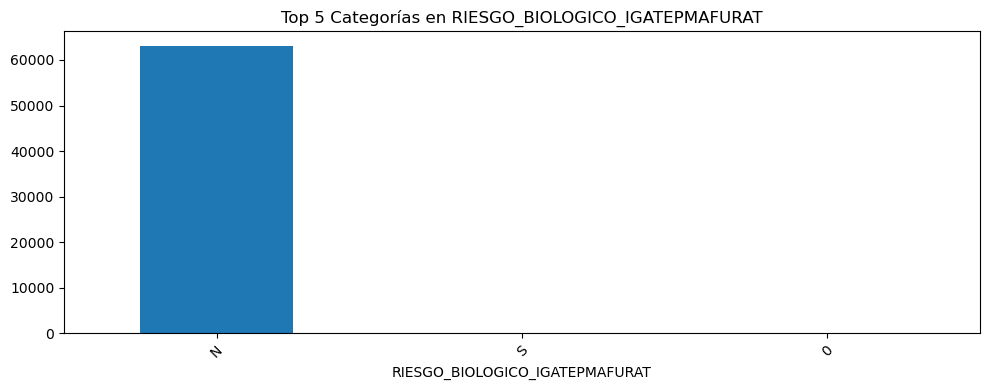


Distribución de valores para MUERTE_POSTERIOR_IGATEPMAFURAT:


MUERTE_POSTERIOR_IGATEPMAFURAT
N     2086
No      54
Si      28
0        1
Name: count, dtype: int64

Número de valores únicos: 4


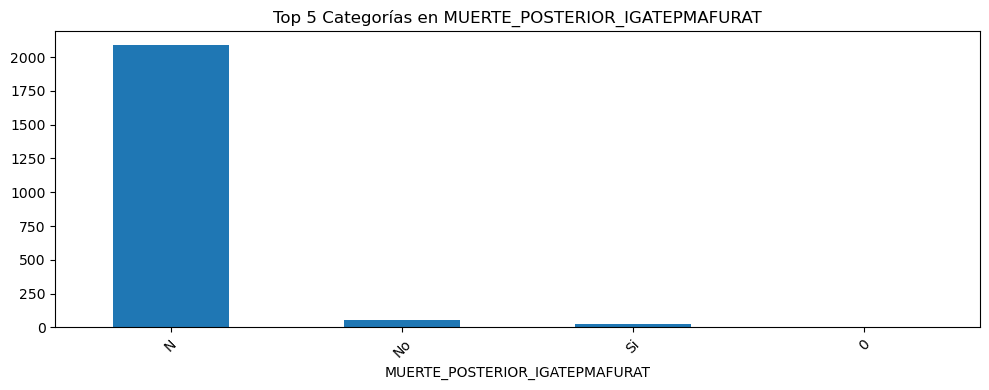


Distribución de valores para FECHA_AVISO_MUERTE_IGATEPMAFURAT:


FECHA_AVISO_MUERTE_IGATEPMAFURAT
2006-12-26 00:00:00+00:00    1
2007-03-28 00:00:00+00:00    1
2008-03-13 00:00:00+00:00    1
2006-07-17 00:00:00+00:00    1
Name: count, dtype: int64

Número de valores únicos: 4


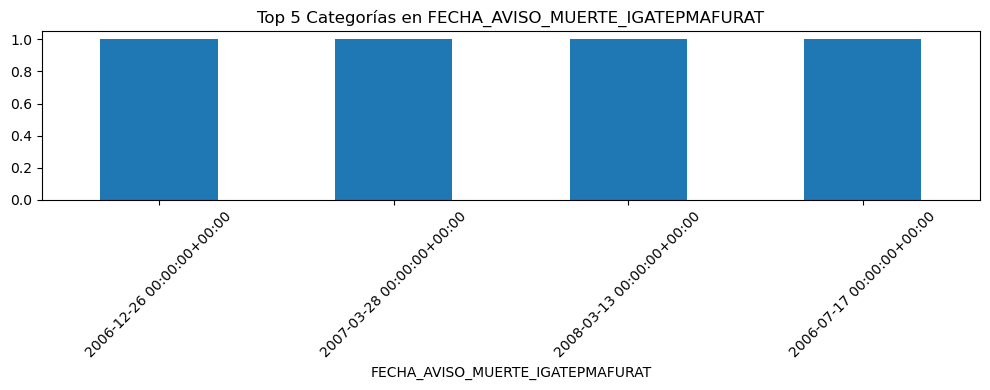


Distribución de valores para FECHA_MODIFICACION_AUD_IGATEPMAFURAT:


FECHA_MODIFICACION_AUD_IGATEPMAFURAT
2009-02-24 00:00:00+00:00    9303
2009-03-05 00:00:00+00:00     123
2009-03-09 00:00:00+00:00     106
2009-04-29 00:00:00+00:00     103
2009-02-23 00:00:00+00:00      98
Name: count, dtype: int64

Número de valores únicos: 34579


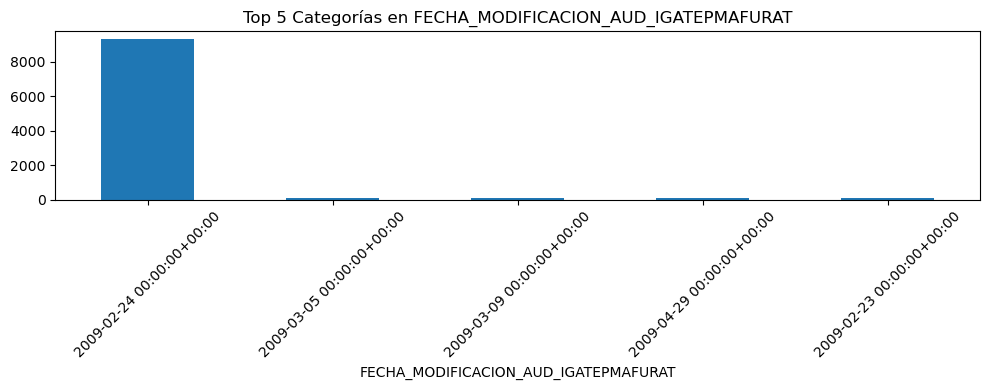


Distribución de valores para NOMBRE_DIAGNOSTICO_IGACCTMIMVDIAGNOSTICOS:


NOMBRE_DIAGNOSTICO_IGACCTMIMVDIAGNOSTICOS
LUMBAGO NO ESPECIFICADO             54
LUMBALGIA MECANICA                  35
CUERPO EXTRAÃ‘O EN OJO IZQUIERDO    35
POLITRAUMATISMO                     31
LUMBALGIA                           29
Name: count, dtype: int64

Número de valores únicos: 6731


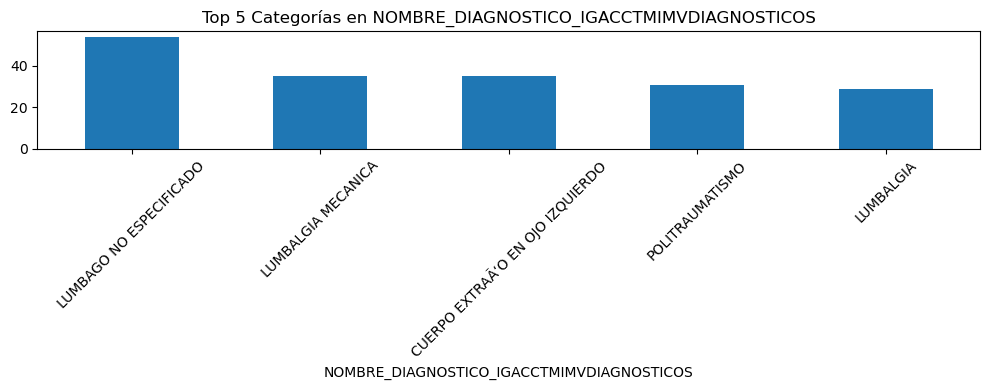


Distribución de valores para ID_DX_IGACCTMIMVDIAGNOSTICOS:


ID_DX_IGACCTMIMVDIAGNOSTICOS
S610    411
M545    319
S800    252
S600    169
S682    144
Name: count, dtype: int64

Número de valores únicos: 1095


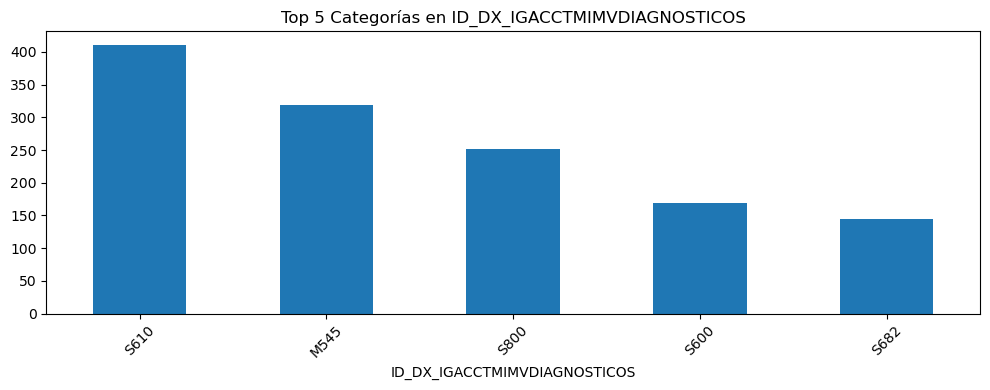


Distribución de valores para TIPO_CALIFICACION_IGACCTMIMVDIAGNOSTICOS:


TIPO_CALIFICACION_IGACCTMIMVDIAGNOSTICOS
DTO    6040
PCL    2562
PRR       1
Name: count, dtype: int64

Número de valores únicos: 3


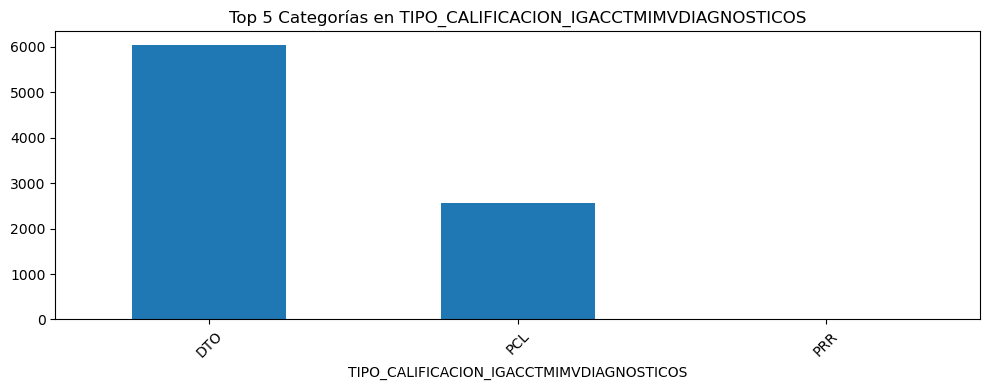


Distribución de valores para FECHA_MODIFICACION_AUD_IGACCTMIMVDIAGNOSTICOS:


FECHA_MODIFICACION_AUD_IGACCTMIMVDIAGNOSTICOS
2012-12-11 17:00:01+00:00    18
2018-08-03 16:52:25+00:00     3
2018-05-28 17:04:23+00:00     3
2019-02-08 07:16:09+00:00     3
2019-03-19 09:43:17+00:00     3
Name: count, dtype: int64

Número de valores únicos: 8551


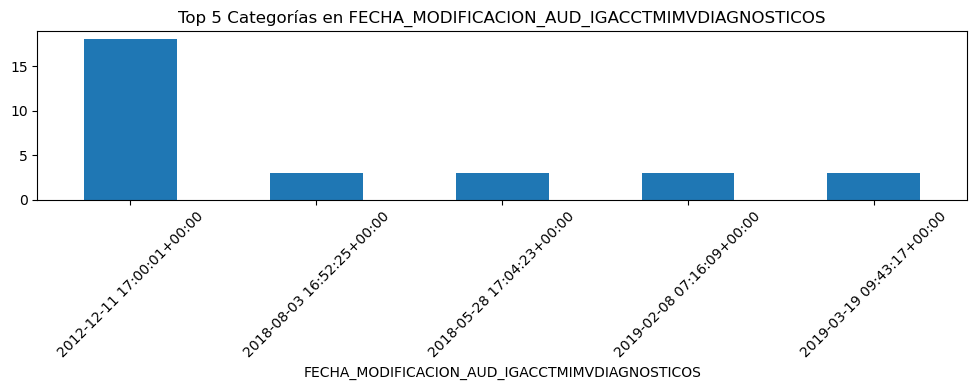


Distribución de valores para FECHA_DICTAMEN_IGDACTMLMACALIFICACIONORIGEN:


FECHA_DICTAMEN_IGDACTMLMACALIFICACIONORIGEN
2008-12-31 00:00:00+00:00    5599
2015-01-31 00:00:00+00:00    4329
2014-09-30 00:00:00+00:00    1641
2015-03-31 00:00:00+00:00    1493
2014-10-31 00:00:00+00:00    1334
Name: count, dtype: int64

Número de valores únicos: 32358


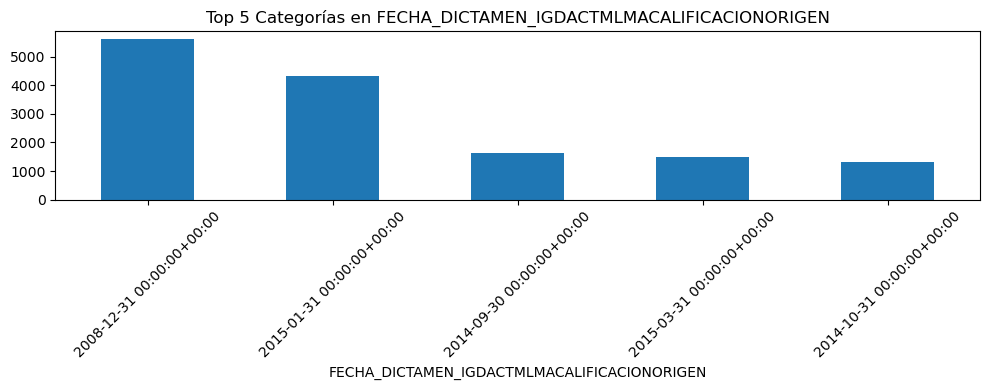


Distribución de valores para FECHA_ESTRUCTURACION_IGDACTMLMACALIFICACIONORIGEN:


FECHA_ESTRUCTURACION_IGDACTMLMACALIFICACIONORIGEN
2015-02-16 00:00:00+00:00    206
2015-02-23 00:00:00+00:00    205
2010-02-15 00:00:00+00:00    200
2015-03-17 00:00:00+00:00    197
2015-02-18 00:00:00+00:00    192
Name: count, dtype: int64

Número de valores únicos: 3299


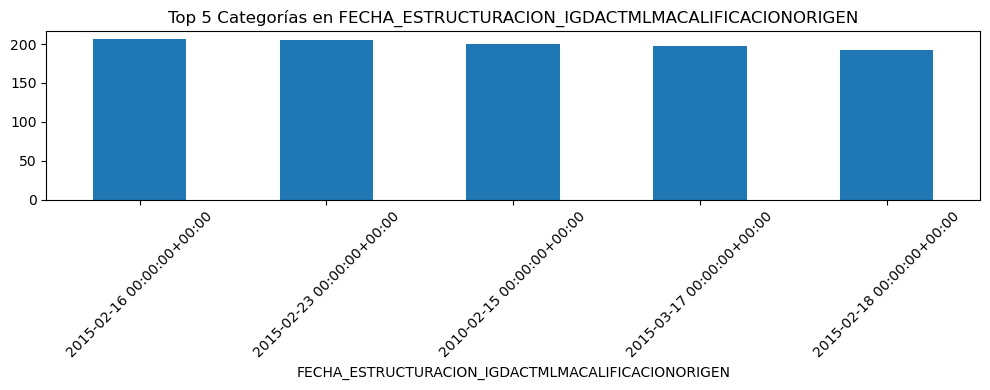


Distribución de valores para FECHA_MODIFICACION_AUD_IGDACTMLMACALIFICACIONORIGEN:


FECHA_MODIFICACION_AUD_IGDACTMLMACALIFICACIONORIGEN
2010-02-15 00:00:00+00:00    7580
2015-07-22 00:00:00+00:00    5580
2010-10-29 00:00:00+00:00    1867
2015-02-09 00:00:00+00:00    1323
2015-02-07 00:00:00+00:00    1232
Name: count, dtype: int64

Número de valores únicos: 36517


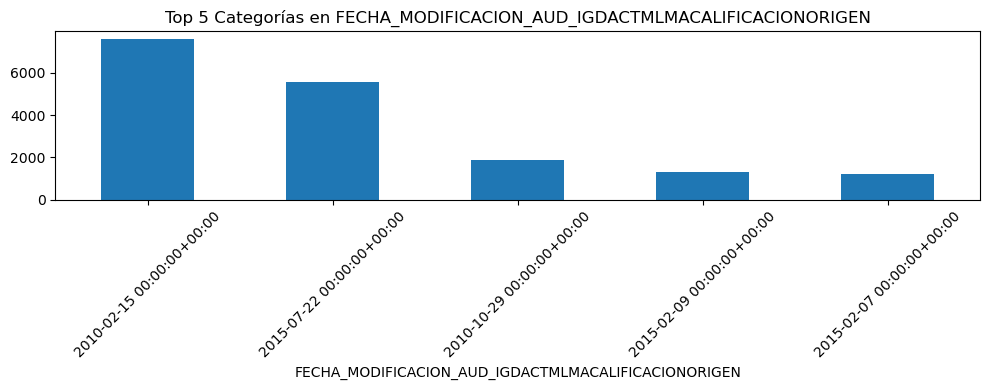

In [5]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Análisis de frecuencias
for col in categorical_cols:
    print(f"\nDistribución de valores para {col}:")
    display(df[col].value_counts().head())
    print(f"Número de valores únicos: {df[col].nunique()}")
    
    # Visualización para las primeras 5 categorías
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head().plot(kind='bar')
    plt.title(f'Top 5 Categorías en {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 6. Análisis de Correlaciones

Examinaremos las correlaciones entre variables numéricas para identificar relaciones potenciales.

Analizando correlaciones...
Note: 'Unnamed: 0' column excluded as it is just a counter.

=== Correlation Matrix (Correlations ≥ 0.3) ===


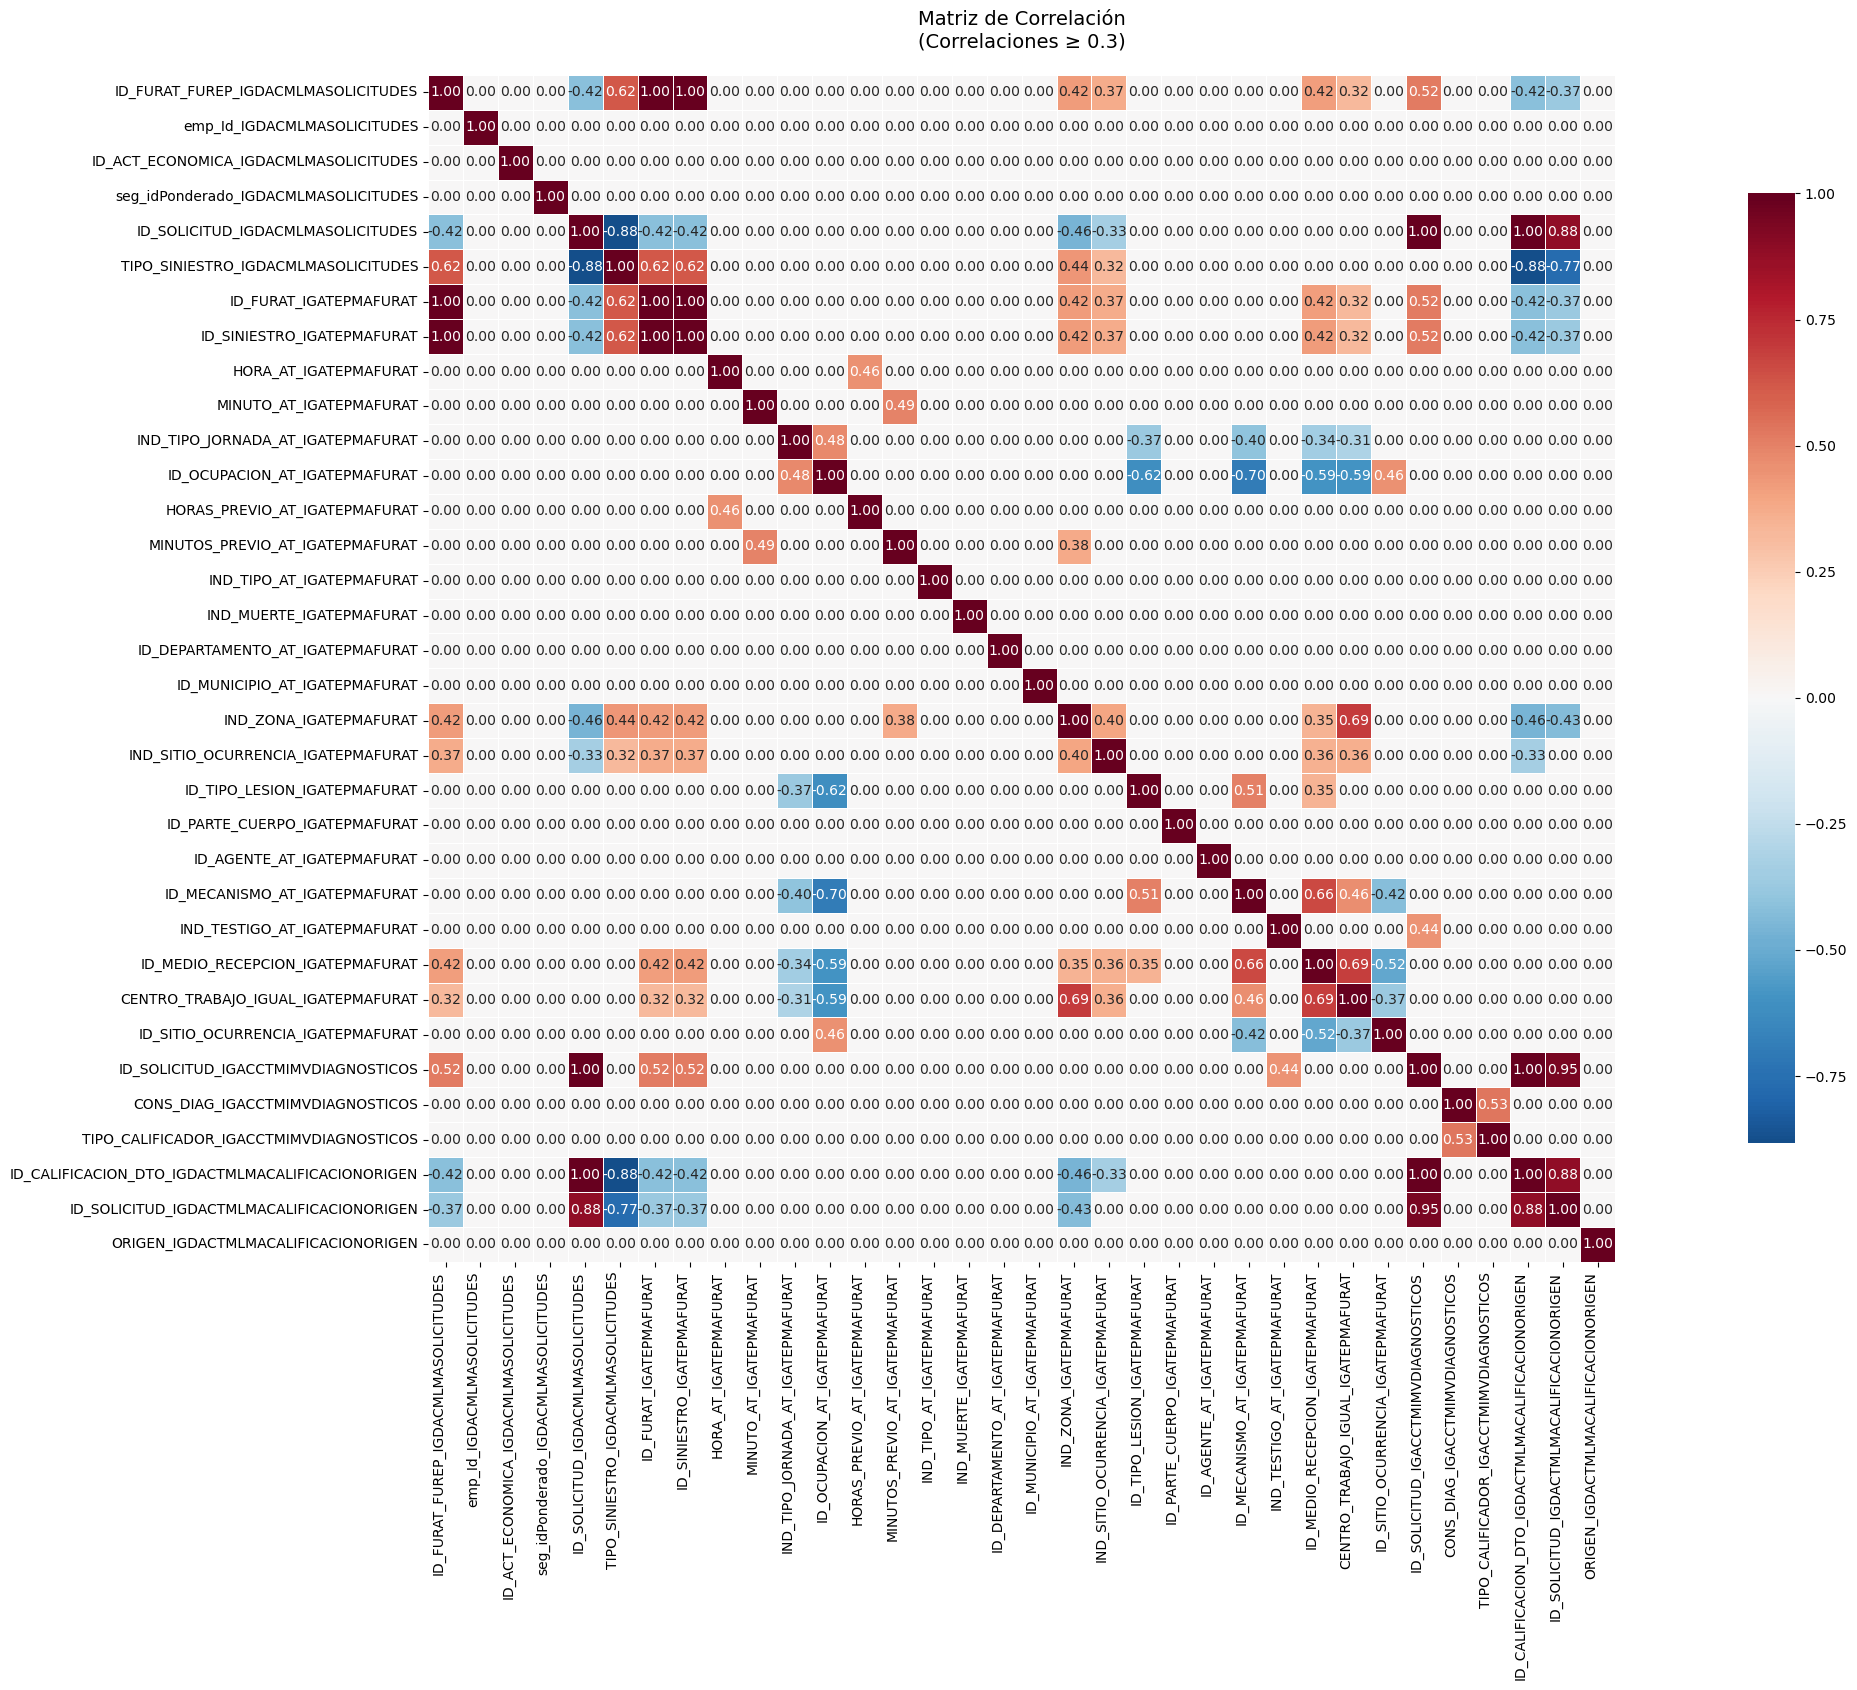

In [7]:
# Análisis de Correlaciones Mejorado
print("Analizando correlaciones...")
analyze_correlations(df)

## 7. Conclusiones del Análisis Exploratorio de Datos (EDA)

Tras realizar un análisis exploratorio de datos (EDA) sobre el dataset proporcionado, se obtienen las siguientes conclusiones:

### Información Básica del Dataset

*   **Tamaño del dataset:** El dataset contiene **63164 filas y 65 columnas**, lo que indica un volumen de datos considerable para el análisis.
*   **Número de columnas:**  El dataset cuenta con un elevado número de variables (65 columnas), lo que sugiere una rica variedad de información disponible para el análisis.
*   **Tipos de datos:** Se observan columnas con diferentes tipos de datos, incluyendo `int64`, `float64` y `object`. Esto indica una combinación de variables numéricas y categóricas, las cuales requerirán diferentes enfoques de análisis y preprocesamiento.

### Análisis de Valores Faltantes

*   **Valores faltantes significativos:**  Se detecta una cantidad considerable de valores faltantes en varias columnas. Destacan particularmente:
    *   `ID_ACT_ECONOMICA_IGDACMLMASOLICITUDES` (77.23%)
    *   `FECHA_MUERTE_IGATEPMAFURAT` (99.66%)
    *   `MONTO_RESERVA_IGATEPMAFURAT` (99.72%)
    *   `DIAS_INCAPACIDAD_IGATEPMAFURAT` (99.67%)
    *   Columnas relacionadas con `IGACCTMIMVDIAGNOSTICOS` y `IGDACTMLMACALIFICACIONORIGEN` también presentan altos porcentajes de valores faltantes (superiores al 86%).
*   **Columnas con pocos faltantes:** Algunas columnas como `DTO_IGDACMLMASOLICITUDES`, `PCL_IGDACMLMASOLICITUDES` y `FECHA_SINIESTRO_IGDACMLMASOLICITUDES` tienen un porcentaje de valores faltantes mucho menor (inferior al 10% o incluso al 1%).
*   **Implicaciones:** La alta proporción de valores faltantes en ciertas columnas podría indicar:
    *   **Falta de relevancia de algunas variables:**  Variables con casi todos los valores faltantes (e.g., `FECHA_MUERTE_IGATEPMAFURAT`, `MONTO_RESERVA_IGATEPMAFURAT`, `DIAS_INCAPACIDAD_IGATEPMAFURAT`) podrían no ser relevantes para la mayoría de los registros, o podrían ser aplicables solo en casos muy específicos.
    *   **Problemas en la recolección de datos:** Podría haber problemas sistemáticos en la forma en que se recolectan o registran estos datos.
    *   **Necesidad de estrategias de imputación o eliminación:** Será necesario decidir cómo tratar estos valores faltantes. Opciones incluyen la imputación (rellenar los valores faltantes con estimaciones) o la eliminación de columnas o filas, dependiendo del análisis específico y la importancia de las variables.

### Análisis de Columnas Numéricas

*   **Estadísticas descriptivas:** El resumen estadístico revela la distribución y rango de valores para las variables numéricas. Es importante revisar en detalle cada variable para entender sus características y posibles valores atípicos.
*   **Skewness (Asimetría):**  Se observa asimetría en varias variables, con valores positivos y negativos.
    *   **Asimetría positiva alta:** Variables como `ID_FURAT_FUREP_IGDACMLMASOLICITUDES`, `ID_FURAT_IGATEPMAFURAT`, `ID_SINIESTRO_IGATEPMAFURAT`, `CONS_DIAG_IGACCTMIMVDIAGNOSTICOS`, `TIPO_CALIFICADOR_IGACCTMIMVDIAGNOSTICOS`  presentan asimetría positiva, indicando una concentración de valores en la parte inferior del rango y una cola extendida hacia valores más altos.
    *   **Asimetría negativa:**  Variables como `emp_Id_IGDACMLMASOLICITUDES`, `ID_OCUPACION_AT_IGATEPMAFURAT`, `ORIGEN_IGDACTMLMACALIFICACIONORIGEN` muestran asimetría negativa, con concentración de valores en la parte superior y cola hacia valores más bajos.
    *   **Variables con baja asimetría:** Algunas variables como `HORA_AT_IGATEPMAFURAT` y `IND_ZONA_IGATEPMAFURAT` tienen una asimetría cercana a cero, sugiriendo una distribución más simétrica.
*   **Kurtosis (Apuntamiento):**  La kurtosis indica la forma de la distribución, en particular, el grosor de las colas.
    *   **Kurtosis alta:** Variables como `IND_MUERTE_IGATEPMAFURAT`, `CONS_DIAG_IGACCTMIMVDIAGNOSTICOS`, `TIPO_CALIFICADOR_IGACCTMIMVDIAGNOSTICOS`, `ORIGEN_IGDACTMLMACALIFICACIONORIGEN` muestran kurtosis muy alta, indicando distribuciones leptocúrticas con colas pesadas y un pico más pronunciado. Esto podría señalar la presencia de valores atípicos o eventos raros.
    *   **Kurtosis baja o negativa:**  Variables como `ID_SOLICITUD_IGDACMLMASOLICITUDES`, `TIPO_SINIESTRO_IGATEPMAFURAT`, `ID_DEPARTAMENTO_AT_IGATEPMAFURAT`, `IND_ZONA_IGATEPMAFURAT`, `ID_PARTE_CUERPO_IGATEPMAFURAT`, `ID_MEDIO_RECEPCION_IGATEPMAFURAT`, `CENTRO_TRABAJO_IGUAL_IGATEPMAFURAT`, `ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN`, `ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN` presentan kurtosis baja o incluso negativa, indicando distribuciones platicúrticas o mesocúrticas con colas más ligeras y menos valores extremos.
*   **Variables con kurtosis y skewness cero:**  Variables como `MONTO_RESERVA_IGATEPMAFURAT` y `DIAS_INCAPACIDAD_IGATEPMAFURAT`  tienen skewness y kurtosis de cero. Esto puede deberse a que la mayoría de los valores son cero, como se vio en el análisis de estadísticos descriptivos.

### Análisis de Columnas Categóricas

*   **Gran cantidad de valores únicos en algunas columnas de fecha/texto:** Columnas como `FECHA_SOLICITUD_IGDACMLMASOLICITUDES`, `FECHA_MODIFICACION_AUD_IGDACMLMASOLICITUDES`, `FECHA_SINIESTRO_IGDACMLMASOLICITUDES`, `DESCRIPCION_AT_IGATEPMAFURAT`, `NOMBRE_DIAGNOSTICO_IGACCTMIMVDIAGNOSTICOS`, `FECHA_DICTAMEN_IGDACTMLMACALIFICACIONORIGEN`, `FECHA_MODIFICACION_AUD_IGDACTMLMACALIFICACIONORIGEN` tienen un alto número de valores únicos. Esto es esperable en columnas de fecha y texto descriptivo.
*   **Categorías dominantes:** En varias columnas categóricas se observan categorías dominantes. Por ejemplo:
    *   `DTO_IGDACMLMASOLICITUDES` y `PCL_IGDACMLMASOLICITUDES`: La categoría 'S' es ampliamente dominante.
    *   `ID_TIPO_DOC_EMP_IGDACMLMASOLICITUDES`: 'NI' es la categoría más frecuente.
    *   `IND_REALIZANDO_TRABAJO_HAB_AT_IGATEPMAFURAT`: 'SI' y 'S' son las categorías más comunes.
    *   `OFICIO_SOLICITUD_IGATEPMAFURAT`, `ACCIDENTE_GRAVE_IGATEPMAFURAT`, `RIESGO_BIOLOGICO_IGATEPMAFURAT`, `MUERTE_POSTERIOR_IGATEPMAFURAT`: La categoría 'N' es la más frecuente.
    *   `TIPO_CALIFICACION_IGACCTMIMVDIAGNOSTICOS`: 'DTO' y 'PCL' son las categorías principales.
*   **Necesidad de preprocesamiento:** Las columnas categóricas que se consideren relevantes para el modelado requerirán preprocesamiento, como codificación (e.g., one-hot encoding, label encoding) para ser utilizadas en algoritmos de machine learning.


### Análisis de Correlaciones

Se realizó un análisis de correlaciones para identificar relaciones lineales entre las variables numéricas del dataset, considerando un umbral mínimo de correlación de 0.3 en valor absoluto. Los hallazgos más relevantes son:

*   **Alta Correlación Positiva (≥ 0.7):**
    *   Se observa una **correlación positiva perfecta (1.00)** entre los siguientes pares de variables, lo que sugiere que son prácticamente la misma variable o están extremadamente relacionadas:
        *   `ID_FURAT_FUREP_IGDACMLMASOLICITUDES` y `ID_FURAT_IGATEPMAFURAT`
        *   `ID_FURAT_FUREP_IGDACMLMASOLICITUDES` y `ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN`
        *   `ID_FURAT_IGATEPMAFURAT` y `ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN`
        *   `ID_SOLICITUD_IGACCTMIMVDIAGNOSTICOS` y `ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN`
    *   Existe una **correlación muy alta (0.996 - 0.997)** entre:
        *   `ID_FURAT_FUREP_IGDACMLMASOLICITUDES` y `ID_SINIESTRO_IGATEPMAFURAT`
        *   `ID_FURAT_IGATEPMAFURAT` y `ID_SINIESTRO_IGATEPMAFURAT`
        *   `ID_SINIESTRO_IGATEPMAFURAT` y `ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN`
    *   También se identifica una **alta correlación (0.88)** entre:
        *   `ID_FURAT_FUREP_IGDACMLMASOLICITUDES` y `ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN`
        *   `ID_FURAT_IGATEPMAFURAT` y `ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN`
        *   `ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN` y `ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN`
        *   `ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN` y `ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN` (obviamente 1.0)
    *   Adicionalmente, se observa una **alta correlación (0.82)** entre:
        *   `ID_SINIESTRO_IGATEPMAFURAT` y `ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN`

*   **Alta Correlación Negativa (≥ -0.7):**
    *   Se detecta una **fuerte correlación negativa (-0.88)** entre `ID_SOLICITUD_IGDACMLMASOLICITUDES` y `TIPO_SINIESTRO_IGDACMLMASOLICITUDES`, así como entre `ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN` y `TIPO_SINIESTRO_IGDACMLMASOLICITUDES`. Esto podría indicar que a medida que aumenta el `ID_SOLICITUD_IGDACMLMASOLICITUDES` o `ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN`, disminuye el `TIPO_SINIESTRO_IGDACMLMASOLICITUDES`, o viceversa.
    *   También se observa una **correlación negativa moderadamente fuerte (-0.77)** entre `TIPO_SINIESTRO_IGDACMLMASOLICITUDES` y `ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN`.

*   **Correlaciones Moderadas (≥ 0.5):**
    *   `ID_SOLICITUD_IGACCTMIMVDIAGNOSTICOS` muestra una correlación moderada positiva con:
        *   `ID_FURAT_FUREP_IGDACMLMASOLICITUDES` (0.519)
        *   `ID_FURAT_IGATEPMAFURAT` (0.519)
        *   `ID_SINIESTRO_IGATEPMAFURAT` (0.519)
        *   `ID_SOLICITUD_IGACCTMIMVDIAGNOSTICOS` (obviamente 1.0)
        *   `ID_CALIFICACION_DTO_IGDACTMLMACALIFICACIONORIGEN` (1.0)
        *   `ID_SOLICITUD_IGDACTMLMACALIFICACIONORIGEN` (0.948)
    *   `CONS_DIAG_IGACCTMIMVDIAGNOSTICOS` y `TIPO_CALIFICADOR_IGACCTMIMVDIAGNOSTICOS` presentan una correlación positiva de 0.53.
    *   `TIPO_SINIESTRO_IGDACMLMASOLICITUDES` tiene una correlación positiva moderada con `ID_FURAT_FUREP_IGDACMLMASOLICITUDES`, `ID_FURAT_IGATEPMAFURAT` e `ID_SINIESTRO_IGATEPMAFURAT` (alrededor de 0.62).

*   **Correlaciones Débiles pero Notables (≥ 0.3):**
    *   `CENTRO_TRABAJO_IGUAL_IGATEPMAFURAT` se correlaciona positivamente con `IND_ZONA_IGATEPMAFURAT` (0.69), `ID_MEDIO_RECEPCION_IGATEPMAFURAT` (0.68), e `ID_MECANISMO_AT_IGATEPMAFURAT` (0.46).
    *   `ID_MEDIO_RECEPCION_IGATEPMAFURAT` se correlaciona positivamente con `ID_MECANISMO_AT_IGATEPMAFURAT` (0.65).
    *   `HORA_AT_IGATEPMAFURAT` y `HORAS_PREVIO_AT_IGATEPMAFURAT` muestran una correlación positiva de 0.46.
    *   `MINUTO_AT_IGATEPMAFURAT` y `MINUTOS_PREVIO_AT_IGATEPMAFURAT` tienen una correlación positiva de 0.49.
    *   `ID_OCUPACION_AT_IGATEPMAFURAT` y `ID_SITIO_OCURRENCIA_IGATEPMAFURAT` presentan una correlación positiva de 0.45.
    *   `IND_ZONA_IGATEPMAFURAT` se correlaciona positivamente con `ID_FURAT_FUREP_IGDACMLMASOLICITUDES`, `ID_FURAT_IGATEPMAFURAT` e `ID_SINIESTRO_IGATEPMAFURAT` (alrededor de 0.42).
    *   `IND_SITIO_OCURRENCIA_IGATEPMAFURAT` tiene una correlación positiva con `ID_FURAT_FUREP_IGDACMLMASOLICITUDES`, `ID_FURAT_IGATEPMAFURAT`, `ID_SINIESTRO_IGATEPMAFURAT` (alrededor de 0.37), y `CENTRO_TRABAJO_IGUAL_IGATEPMAFURAT` (0.36).
    *   `ID_MEDIO_RECEPCION_IGATEPMAFURAT` también se correlaciona positivamente con `IND_ZONA_IGATEPMAFURAT` (0.35), `IND_SITIO_OCURRENCIA_IGATEPMAFURAT` (0.35), e `ID_TIPO_LESION_IGATEPMAFURAT` (0.34).
    *   `ID_SOLICITUD_IGACCTMIMVDIAGNOSTICOS` y `IND_TESTIGO_AT_IGATEPMAFURAT` tienen una correlación positiva de 0.44.
    *   `IND_TIPO_JORNADA_AT_IGATEPMAFURAT` y `ID_MEDIO_RECEPCION_IGATEPMAFURAT` muestran una correlación negativa de -0.34, al igual que `IND_TIPO_JORNADA_AT_IGATEPMAFURAT` y `CENTRO_TRABAJO_IGUAL_IGATEPMAFURAT` (-0.30).
    *   `ID_OCUPACION_AT_IGATEPMAFURAT` presenta correlaciones negativas moderadas con `ID_MEDIO_RECEPCION_IGATEPMAFURAT` (-0.59) y `CENTRO_TRABAJO_IGUAL_IGATEPMAFURAT` (-0.59).
    *   `ID_SITIO_OCURRENCIA_IGATEPMAFURAT` muestra correlaciones negativas con `ID_MEDIO_RECEPCION_IGATEPMAFURAT` (-0.52) y `CENTRO_TRABAJO_IGUAL_IGATEPMAFURAT` (-0.37), así como con `ID_MECANISMO_AT_IGATEPMAFURAT` (-0.42).
    *   `ID_SOLICITUD_IGDACMLMASOLICITUDES` se correlaciona negativamente con `IND_ZONA_IGATEPMAFURAT` (-0.46) e `IND_SITIO_OCURRENCIA_IGATEPMAFURAT` (-0.33).

*   **Variables sin Correlaciones Significativas (≈ 0.0):**
    *   Un gran número de variables no muestran correlaciones significativas entre sí (valor cercano a 0 en la matriz). Esto sugiere que estas variables podrían ser independientes o que su relación no es lineal.
    *   Es notable la falta de correlación de `ORIGEN_IGDACTMLMACALIFICACIONORIGEN` con todas las demás variables numéricas analizadas, lo que podría indicar que esta variable opera independientemente de las demás en términos de correlación lineal.
    *   Similarmente, `emp_Id_IGDACMLMASOLICITUDES`, `ID_ACT_ECONOMICA_IGDACMLMASOLICITUDES`, `seg_idPonderado_IGDACMLMASOLICITUDES`, `IND_TIPO_JORNADA_AT_IGATEPMAFURAT`, `ID_DEPARTAMENTO_AT_IGATEPMAFURAT`, `ID_MUNICIPIO_AT_IGATEPMAFURAT`, `ID_TIPO_LESION_IGATEPMAFURAT`, `ID_PARTE_CUERPO_IGATEPMAFURAT`, `ID_AGENTE_AT_IGATEPMAFURAT`, `ID_MECANISMO_AT_IGATEPMAFURAT`, `IND_TESTIGO_AT_IGATEPMAFURAT`, `CONS_DIAG_IGACCTMIMVDIAGNOSTICOS` y `TIPO_CALIFICADOR_IGACCTMIMVDIAGNOSTICOS` (excepto la correlación moderada entre las dos últimas ya mencionada) generalmente no presentan correlaciones fuertes con muchas otras variables, sugiriendo una relativa independencia lineal en este conjunto de datos.

**Implicaciones del Análisis de Correlaciones:**

*   **Redundancia de Variables:** La alta correlación entre ciertos pares de variables (especialmente los ID) sugiere redundancia. En modelos predictivos, podría ser suficiente incluir solo una de estas variables para evitar multicolinealidad.
*   **Relaciones Inesperadas:** Se han identificado correlaciones débiles pero notables entre variables que podrían no ser evidentes a priori, como las relaciones entre `CENTRO_TRABAJO_IGUAL_IGATEPMAFURAT`, `IND_ZONA_IGATEPMAFURAT` y `ID_MEDIO_RECEPCION_IGATEPMAFURAT`. Estas relaciones podrían explorarse más a fondo para entender mejor la dinámica de los datos.
*   **Posible Ingeniería de Features:**  Las correlaciones identificadas podrían inspirar la creación de nuevas features o la combinación de variables existentes para mejorar modelos predictivos. Por ejemplo, la relación entre `HORA_AT_IGATEPMAFURAT` y `HORAS_PREVIO_AT_IGATEPMAFURAT` podría combinarse en una nueva variable que represente el momento del día en relación con el tiempo de trabajo previo al accidente.
*   **Independencia de Variables:** La falta de correlación para muchas variables es también una información valiosa. Indica que estas variables pueden aportar información única y no redundante al modelo.

Es importante recordar que la correlación mide relaciones lineales. La ausencia de correlación no implica necesariamente la ausencia de cualquier tipo de relación entre las variables, ya que podrían existir relaciones no lineales que este análisis no detecta.

---

### 8. Próximos Pasos y Recomendaciones

Basado en el análisis exploratorio de datos realizado, se proponen los siguientes pasos y recomendaciones para continuar con el análisis y modelado de los datos:

1.  **Gestión de Valores Faltantes:**
    *   **Investigar la causa de los valores faltantes:** Profundizar en la razón detrás de la alta cantidad de valores nulos en ciertas columnas. ¿Es un problema de recolección, de aplicabilidad de la variable, o hay otro motivo?
    *   **Implementar estrategias de imputación o eliminación:**  Decidir cómo tratar los valores faltantes. Para columnas con un porcentaje muy alto de nulos y baja relevancia aparente (`FECHA_MUERTE_IGATEPMAFURAT`, `MONTO_RESERVA_IGATEPMAFURAT`, `DIAS_INCAPACIDAD_IGATEPMAFURAT`), considerar la eliminación. Para otras columnas, evaluar técnicas de imputación (media, mediana, moda, imputación basada en modelos, etc.) según el tipo de variable y el objetivo del análisis.
    *   **Documentar las decisiones:** Registrar las estrategias de manejo de valores faltantes aplicadas y la justificación de cada una.

2.  **Preprocesamiento de Columnas Categóricas:**
    *   **Codificar variables categóricas:** Aplicar técnicas de codificación adecuadas a las variables categóricas relevantes para el modelado. Considerar `one-hot encoding` para variables nominales sin orden intrínseco y `label encoding` o `ordinal encoding` si existe un orden.
    *   **Manejar alta cardinalidad en columnas de texto/fecha:** Para columnas con muchos valores únicos (texto descriptivo, fechas), evaluar si es posible extraer información más granular (por ejemplo, extraer el año y el mes de las fechas, o aplicar técnicas de NLP a columnas de texto si son relevantes para el análisis).

3.  **Tratamiento de Columnas Numéricas:**
    *   **Abordar la asimetría y kurtosis:**  Considerar transformaciones (logarítmica, raíz cuadrada, Box-Cox, etc.) para reducir la asimetría en variables numéricas si se planea utilizar modelos sensibles a la distribución normal de los datos.
    *   **Evaluar y manejar valores atípicos:**  Investigar los valores atípicos identificados en el análisis de kurtosis y boxplots. Decidir si deben ser eliminados, transformados o mantenidos, dependiendo de su naturaleza y posible impacto en el modelado.

4.  **Reducción de Dimensionalidad y Selección de Features:**
    *   **Gestionar la redundancia:** Debido a la alta correlación entre algunos IDs, considerar eliminar las variables redundantes para simplificar el modelo y evitar multicolinealidad. Seleccionar un representante de cada grupo de variables altamente correlacionadas.
    *   **Feature Selection:** Aplicar técnicas de selección de features (basadas en importancia de variables, métodos wrapper, métodos filter, etc.) para identificar y seleccionar las variables más relevantes para el objetivo específico del análisis o modelado.

5.  **Investigación Adicional de Correlaciones:**
    *   **Profundizar en correlaciones inesperadas:** Investigar las razones detrás de las correlaciones débiles pero notables identificadas, especialmente aquellas que involucran a `CENTRO_TRABAJO_IGUAL_IGATEPMAFURAT`, `IND_ZONA_IGATEPMAFURAT`, `ID_MEDIO_RECEPCION_IGATEPMAFURAT`, `ID_OCUPACION_AT_IGATEPMAFURAT`, etc.  Esto podría revelar insights valiosos sobre los datos.
    *   **Considerar análisis de correlaciones no lineales:** Explorar métodos para detectar y medir relaciones no lineales entre variables, ya que el análisis de correlación lineal solo captura una parte de las posibles interacciones entre las variables.

6.  **Definición Clara del Objetivo del Modelado (si aplica):**
    *   **Especificar el problema:**  Definir claramente el objetivo que se persigue con el modelado. ¿Se busca predecir alguna variable en particular? ¿Clasificar eventos? ¿Agrupar datos? El objetivo guiará las decisiones de preprocesamiento, selección de features y elección del modelo.

Siguiendo estas recomendaciones, se podrá avanzar hacia una mejor comprensión de los datos y preparar el dataset de manera efectiva para futuras etapas de análisis y modelado.